In [ ]:
#!python -m spacy download pt
#!pip install pyLDAvis

In [31]:
import pandas as pd
import gensim
from gensim import corpora
import numpy as np
import tqdm
import pt_core_news_sm
import spacy
from spacy import displacy 
import warnings
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import matplotlib.pyplot as plt
import re
from utils import pre_text_processing
from utils import calcula_embedding_frase
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np
import nltk

pyLDAvis.enable_notebook()
nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
df = pd.read_csv("df_analise.csv")

In [21]:
df.rename(columns={"Unnamed: 0":"name_id"}, inplace=True)

In [22]:
df

name_id Você sabe programar?  ... da_worker               formation
0         0                  Sim  ...         0  information_technology
1         1                  Sim  ...         0  information_technology
2         2                  Sim  ...         0  information_technology
3         3                  Não  ...         0  information_technology
4         4                  Sim  ...         0             engineering
5         5                  Sim  ...         0             engineering
6         6                  Sim  ...         1  information_technology
7         7                  Sim  ...         1             engineering
8         8                  Sim  ...         0                   other
9         9                  Sim  ...         0  information_technology
10       10                  Sim  ...         0             engineering
11       11                  Sim  ...         0  information_technology

[12 rows x 14 columns]

# O que é essencial estudar em NLP?
Para você, o que é essencial estudar nesta disciplina

In [98]:
expectations = df["Para você, o que é essencial estudar nesta disciplina?"].values

In [99]:
expectations_clean = [pre_text_processing(e) for e in expectations]

## LDA

In [100]:
dictionary = corpora.Dictionary(expectations_clean)

In [101]:
doc_bow = [dictionary.doc2bow(doc) for doc in expectations_clean]

In [103]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_bow, num_topics=5, id2word = dictionary, passes=1000, random_state=123, alpha='auto',per_word_topics=True)

In [104]:
ldamodel.show_topics()
#entendimento de como usar
#possibilidades/ similaridades
#representação (embedding)
#implementação de modelos NLP
#aplicações

[(0,
  '0.035*"textos" + 0.035*"afins" + 0.035*"maneira" + 0.035*"informações" + 0.035*"implícitas" + 0.035*"certa" + 0.035*"carga" + 0.035*"realidade" + 0.035*"correto" + 0.035*"los"'),
 (1,
  '0.070*"acho" + 0.070*"similaridade" + 0.070*"textos" + 0.038*"ver" + 0.038*"utilizar" + 0.038*"saber" + 0.038*"texto" + 0.038*"acordo" + 0.038*"processamento" + 0.038*"gostaria"'),
 (2,
  '0.047*"exemplo" + 0.047*"embedding" + 0.047*"sinceramente" + 0.047*"aplicabilidade" + 0.047*"disciplina" + 0.047*"representação" + 0.047*"prática" + 0.047*"saberia" + 0.047*"dizer" + 0.047*"ver"'),
 (3,
  '0.049*"linguagem" + 0.049*"humana" + 0.049*"alguns" + 0.049*"entende" + 0.049*"entender" + 0.049*"funcionalidade" + 0.049*"implementar" + 0.049*"saber" + 0.049*"modelos" + 0.049*"processo"'),
 (4,
  '0.047*"aplicação" + 0.047*"textuais" + 0.047*"análise" + 0.047*"português" + 0.047*"problema" + 0.047*"real" + 0.047*"bert" + 0.047*"classificação" + 0.047*"sentimento" + 0.047*"dados"')]

In [ ]:
pyLDAvis.enable_notebook()

In [ ]:
LDAvis_prepared = gensimvis.prepare(ldamodel, doc_bow, dictionary)

In [ ]:
LDAvis_prepared

## NER

In [ ]:
nlp = pt_core_news_sm.load()

In [ ]:
expectations_nlp = [nlp(e) for e in expectations]

In [ ]:
for e in expectations_nlp:
    displacy.render(e, jupyter=True, style='ent')

# Sobre a expectativa.

Descreva qual seria sua expectativa com relação ao conteúdo da disciplina. Como você acredita que essa disciplina pode contribuir com sua formação?

In [105]:
col_expectation = 'Descreva qual seria sua expectativa com relação ao conteúdo da disciplina. Como  você acredita que essa disciplina pode contribuir com sua formação?'

In [106]:
expectations = df.loc[:,col_expectation].values

In [107]:
expectations_clean = [pre_text_processing(e) for e in expectations]

## LDA

In [108]:
dictionary = corpora.Dictionary(expectations_clean)

In [109]:
doc_bow = [dictionary.doc2bow(doc) for doc in expectations_clean]

In [52]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_bow, num_topics=4, id2word = dictionary, passes=1000, random_state=123)

In [53]:
ldamodel.show_topics()

[(0,
  '0.028*"útil" + 0.028*"trabalho" + 0.028*"diferentes" + 0.015*"aplicações" + 0.015*"soluções" + 0.015*"disciplina" + 0.015*"pode" + 0.015*"acredito" + 0.015*"atualmente" + 0.015*"eficientes"'),
 (1,
  '0.025*"suporte" + 0.025*"fazer" + 0.025*"parte" + 0.017*"disciplina" + 0.017*"ser" + 0.017*"acredito" + 0.010*"nlp" + 0.010*"importante" + 0.010*"aplicações" + 0.010*"expectativa"'),
 (2,
  '0.027*"nlp" + 0.026*"mercado" + 0.015*"disciplina" + 0.015*"conhecimentos" + 0.015*"projetos" + 0.015*"forma" + 0.015*"prática" + 0.015*"principais" + 0.015*"objetiva" + 0.015*"processamento"'),
 (3,
  '0.022*"área" + 0.022*"algum" + 0.022*"curso" + 0.022*"pois" + 0.015*"análise" + 0.015*"linguagem" + 0.015*"parte" + 0.015*"projeto" + 0.015*"empresa" + 0.015*"necessário"')]

In [55]:
LDAvis_prepared = gensimvis.prepare(ldamodel, doc_bow, dictionary)

In [56]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.116939  0.037440       1        1  39.426886
1      0.091109  0.065295       2        1  32.263378
2      0.017162 -0.080099       3        1  14.611071
0      0.008668 -0.022636       4        1  13.698665, topic_info=          Term      Freq     Total Category  logprob  loglift
34  diferentes  1.000000  1.000000  Default  30.0000  30.0000
52        útil  2.000000  2.000000  Default  29.0000  29.0000
68     mercado  2.000000  2.000000  Default  28.0000  28.0000
25    trabalho  2.000000  2.000000  Default  27.0000  27.0000
19         nlp  2.000000  2.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
1   aplicações  0.537852  2.027931   Topic4  -4.1696   0.6607
30  atualmente  0.535319  2.074220   Topic4  -4.1744   0.6334
26    acredito  0.535402  2.216510   Topic4  -4.1742   0.5672
27       algum  0.534860  2.981295   Topic4  -4.1752   0.2698
9   disciplina  0.536719  3.321766   Topic4  -4.1717   0.1651

[169 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
140       1  0.825875       achar
141       1  0.825875        acho
26        2  0.451160    acredito
26        4  0.451160    acredito
0         2  0.859004  adquiridos
...     ...       ...         ...
79        2  0.859004  vendedores
135       1  0.629398        área
135       2  0.314699        área
52        2  0.495193        útil
52        4  0.495193        útil

[163 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

In [110]:
for e in expectations_nlp:
    displacy.render(e, jupyter=True, style='ent')

## Embedding

In [58]:
from gensim.models import KeyedVectors

In [60]:
%%time
# carregar
##na variável path coloque o caminho do embedding baixado:
#from google.colab import drive
#drive.mount('/content/drive')
path = "/content/drive/MyDrive/PUC/Pós Graduação/EAD | 2021 | NLP/Aulas/Unidade 4/Prática/ptwiki_20180420_300d.txt.bz2"
word_vectors = gensim.models.KeyedVectors.load_word2vec_format(path, binary=False)

CPU times: user 6min 26s, sys: 2.09 s, total: 6min 28s
Wall time: 6min 29s


In [111]:
def calcula_embedding_frase(tokens):
    #return np.mean(np.array([word_vectors[t] for t in tokens if t in word_vectors.vocab]), axis=0)
    return np.mean(np.array([word_vectors[t] for t in tokens if t in word_vectors.vocab]), axis=0)

In [112]:
embedding_expectations = [calcula_embedding_frase(e) for e in expectations_clean]

In [113]:
np.array(embedding_expectations).shape

(12, 300)

In [114]:
df["embedding_expectations"] = embedding_expectations

In [115]:
np.array(embedding_expectations).shape

(12, 300)

### Quantos grupos?

Text(0.5, 1.0, 'Elbow curve')

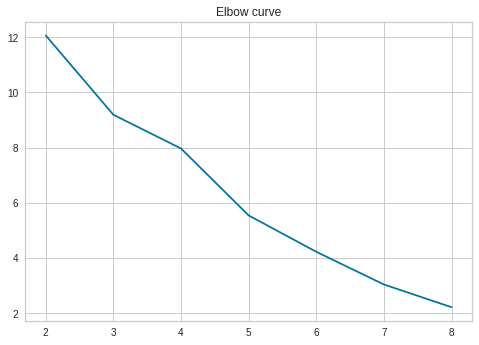

In [116]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = embedding_expectations
distorsions = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

#fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 9), distorsions)
plt.grid(True)
plt.title('Elbow curve')

### Executa Kmeans

In [117]:
model = KMeans(n_clusters=5, random_state=123)

In [118]:
model.fit(embedding_expectations)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [119]:
labels = model.labels_
labels

array([0, 2, 2, 4, 2, 2, 1, 0, 2, 0, 3, 0], dtype=int32)

In [120]:
df["cluster"] = labels

### Quais são esses grupos?

In [121]:
df["cluster"].value_counts()

2    5
0    4
4    1
1    1
3    1
Name: cluster, dtype: int64

In [127]:
df[df["cluster"] == 0][col_expectation].values

array(['NLP é uma parte importante para quem deseja fazer parte de projetos envolvendo Inteligência artificial. Em meu trabalho há uma equipe desenvolvendo aplicações em IA e ML e esta disciplina fará com que eu fique mais preparado para fazer parte deste time e aprofundar os conhecimentos adquiridos em sala de aula.',
       'Estudo e trabalhei a pouco tempo com NLP e com certeza essa disciplina vai me dar um norte bacana para eu continuar navegando nesse assunto.',
       'Acredito que com o conteúdo da disciplina pode ser útil no futuro se por acaso eu acabe mudando para a área de Ciência de Dados.',
       'Não tinha muita idéia de como era o curso, como funcionavam as disciplinas e como seria a área. Cheguei a pensar em desistir por achar que na empresa que eu trabalho atualmente não há espaço uma área deste tipo. Porém resolvi continuar no curso pois estava gostando do que estava aprendendo. Nessa empresa recentemente houve um início de projeto nesta área envolvendo inclusive o t

In [128]:
df[df["cluster"] == 1][col_expectation].values

array(['Aplicações práticas de NLP.'], dtype=object)

In [130]:
df[df["cluster"] == 2][col_expectation].values

array(['Atualmente trabalho no desenvolvimento de diferentes softwares com aplicações vastamente diferentes. Não há nenhuma aplicação direta da disciplina no meu trabalho atual, entretanto é muito difícil precisar quanto algum material será útil futuramente. Acredito que todo conhecimento é útil e pode levar a soluções criativas e eficientes em problemas futuros.',
       'Para o mercado que atuo, atacado/distribuidor, acredito que seria interessante para prestação de suporte aos vendedores de forma rápida, dentro do app de força de vendas que temos, sem depender de um suporte humano para casos simples e que muitas meses ocupam os analistas de suporte quando poderiam estar com demandas realmente importantes.',
       'Minha expectativa é de aprender essa disciplina para melhorar o uso da engenharia, através de uma melhora na capacidade de análise de informações',
       'Obter conhecimentos de forma prática e objetiva dos métodos do estado da arte mais utilizados no mercado atualmente 

In [125]:
df[df["cluster"] == 3][col_expectation].values

array(['Ela é importante para tirarmos insigths de campos de texto.'],
      dtype=object)

In [126]:
df[df["cluster"] == 4][col_expectation].values

array(['Utilizar NLP para desenvolver soluções inteligentes'],
      dtype=object)